# LeNet Model

In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [3]:
for dirname, _, filenames in os.walk('C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00001.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00002.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00003.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00004.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00005.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00006.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00007.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00008.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00009.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00975.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00976.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00977.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00978.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00979.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00980.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00981.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00982.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\00983.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\02331.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\02332.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\02333.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\02334.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\02335.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\02336.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\02337.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\02338.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\02339.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\03754.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\03755.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\03756.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\03757.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\03758.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\03759.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\03760.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\03761.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\03762.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\05273.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\05274.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\05275.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\05276.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\05277.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\05278.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\05279.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\05280.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\05281.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\06488.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\06489.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\06490.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\06491.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\06492.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\06493.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\06494.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\06495.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\06496.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\07599.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\07600.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\07601.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\07602.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\07603.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\07604.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\07605.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\07606.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\07607.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\08875.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\08876.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\08877.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\08878.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\08879.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\08880.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\08881.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\08882.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\08883.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\10003.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\10004.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\10005.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\10006.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\10007.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\10008.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\10009.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\10010.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\10011.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\11133.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\11134.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\11135.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\11136.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\11137.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\11138.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\11139.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\11140.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\11141.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\12690.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\12691.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\12692.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\12693.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\12694.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\12695.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\12696.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\12697.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\12698.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\14000.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\14001.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\14002.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\14003.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\14004.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\14005.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\14006.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\14007.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\14008.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\15470.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\15471.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\15472.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\15473.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\15474.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\15475.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\15476.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\15477.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\15478.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\16916.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\16917.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\16918.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\16919.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\16920.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\16921.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\16922.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\16923.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\16924.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\17969.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\17970.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\17971.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\17972.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\17973.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\17974.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\17975.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\17976.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\17977.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\19195.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\19196.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\19197.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\19198.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\19199.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\19200.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\19201.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\19202.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Negative\19203.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00001.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00002.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00003.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00004.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00005.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00006.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00007.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00008.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00009.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00967.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00968.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00969.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00970.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00971.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00972.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00973.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00974.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\00975.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\02467.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\02468.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\02469.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\02470.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\02471.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\02472.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\02473.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\02474.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\02475.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\03919.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\03920.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\03921.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\03922.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\03923.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\03924.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\03925.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\03926.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\03927.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\05522.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\05523.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\05524.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\05525.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\05526.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\05527.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\05528.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\05529.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\05530.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\07004.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\07005.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\07006.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\07007.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\07008.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\07009.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\07010.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\07011.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\07012.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\08499.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\08500.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\08501.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\08502.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\08503.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\08504.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\08505.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\08506.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\08507.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\10208_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\10209_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\10210_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\10211_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\10212_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\10213_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\10214_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\10215_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\10216_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Co

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\11807_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\11808_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\11809_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\11810_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\11811_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\11812_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\11813_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\11814_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\11815_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Co

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\13058_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\13059_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\13060_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\13061_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\13062_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\13063_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\13064_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\13065_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\13066_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Co

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\15020_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\15021_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\15022_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\15023_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\15024_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\15025_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\15026_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\15027_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\15028_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Co

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\16574_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\16575_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\16576_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\16577_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\16578_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\16579_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\16580_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\16581_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\16582_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Co

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\18272_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\18273_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\18274_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\18275_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\18276_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\18277_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\18278_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\18279_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\18280_1.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Co

C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\19961.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\19962.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\19963.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\19964.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\19965.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\19966.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\19967.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\19968.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification\Positive\19969.jpg
C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Image

In [5]:
PATH = 'C:/Users/Arjun/Desktop/College/CBIR Project/Concrete Crack Images for Classification/'
IMG_SIZE = 64
Shapes = ["Negative", "Positive"]
Labels = []
Dataset = []

for shape in Shapes:
    print("Getting data for: ", shape)

    for path in os.listdir(PATH + shape):

        image = cv2.imread(PATH + shape + '/' + path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        Dataset.append(image)
        Labels.append(Shapes.index(shape))

print("\nDataset Images size:", len(Dataset))
print("Image Shape:", Dataset[0].shape)
print("Labels size:", len(Labels))

Getting data for:  Negative
Getting data for:  Positive

Dataset Images size: 40000
Image Shape: (64, 64, 3)
Labels size: 40000


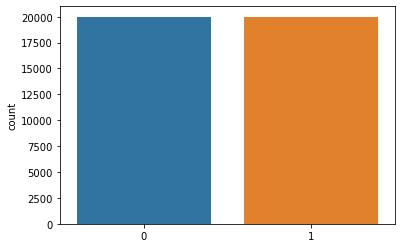

In [6]:
sns.countplot(x= Labels)

In [7]:
print("Count of Positive images:", Labels.count(Shapes.index("Positive")))

print("Count of Negative images:", Labels.count(Shapes.index("Negative")))

Count of Positive images: 20000
Count of Negative images: 20000


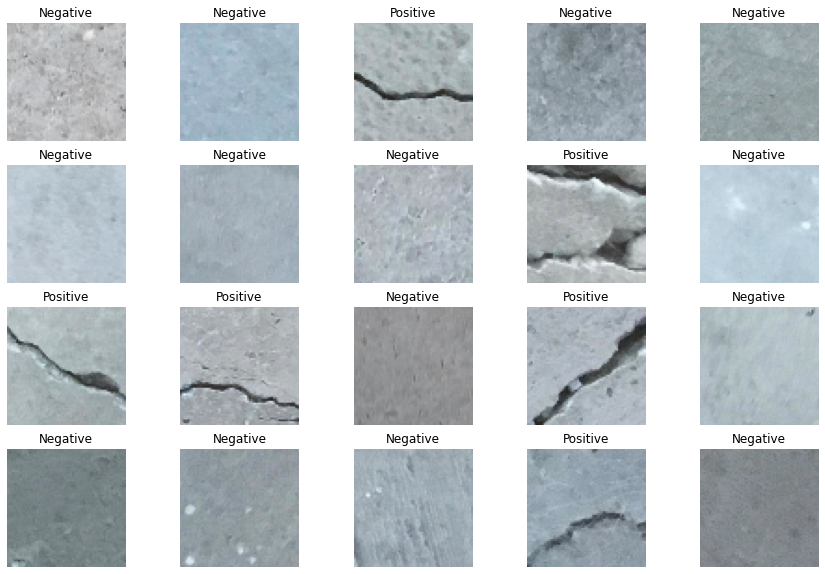

In [8]:
index = np.random.randint(0, len(Dataset) - 1, size= 20)
plt.figure(figsize=(15,10))

for i, ind in enumerate(index, 1):
    img = Dataset[ind]
    lab = Labels[ind]
    lab = Shapes[lab]
    plt.subplot(4, 5, i)
    plt.title(lab)
    plt.axis('off')
    plt.imshow(img)

In [9]:
Dataset = np.array(Dataset)
Dataset = Dataset.astype("float32") / 255.0

Labels = np.array(Labels)
Labels = to_categorical(Labels)

(trainX, testX, trainY, testY) = train_test_split(Dataset, Labels, test_size=0.2, random_state=42)

print("X Train :", trainX.shape)
print("X Test :", testX.shape)
print("Y Train :", trainY.shape)
print("Y Test :", testY.shape)

X Train : (32000, 64, 64, 3)
X Test : (8000, 64, 64, 3)
Y Train : (32000, 2)
Y Test : (8000, 2)


In [10]:
class LeNet():
    @staticmethod
    def build(numChannels, imgRows, imgCols, numClasses,  pooling= "max", activation= "relu"):

        model = Sequential()
        inputShape = (imgRows, imgCols, numChannels)

        model.add(Conv2D(filters= 6, kernel_size= 5, input_shape= inputShape))
        model.add(Activation(activation))

        if pooling == "max":
            model.add(MaxPooling2D(pool_size= (2, 2), strides= (2, 2)))
        else:
            model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2)))

        model.add(Conv2D(filters= 16, kernel_size= 5))
        model.add(Activation(activation))
        
        if pooling == "avg":
            model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
        else:
            model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Flatten())
        model.add(Dense(120))
        model.add(Dropout(0.5))
        model.add(Activation(activation))

        model.add(Dense(84))
        model.add(Dropout(0.5))
        model.add(Activation(activation))

        model.add(Dense(numClasses))
        model.add(Activation("softmax"))

        return model

In [21]:
BS = 120
LR = 0.01
EPOCHS = 10
opt = SGD(learning_rate= LR)

model = LeNet.build(3, IMG_SIZE, IMG_SIZE, 2, pooling= "max")
model.compile(loss= "categorical_crossentropy", optimizer= opt, metrics= ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 6)         456       
                                                                 
 activation_15 (Activation)  (None, 60, 60, 6)         0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 activation_16 (Activation)  (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                  

In [22]:
H1 = model.fit(trainX, trainY, validation_data= (testX, testY), batch_size= BS,
              epochs= EPOCHS, verbose=1)

scores_train = model.evaluate(trainX, trainY, verbose= 1)
scores_test = model.evaluate(testX, testY, verbose= 1)

Epoch 1/10
267/267 [==============================] - 51s 188ms/step - loss: 0.6537 - accuracy: 0.6465 - val_loss: 0.4960 - val_accuracy: 0.9528
Epoch 2/10
267/267 [==============================] - 49s 184ms/step - loss: 0.4473 - accuracy: 0.8263 - val_loss: 0.1759 - val_accuracy: 0.9532
Epoch 3/10
267/267 [==============================] - 51s 190ms/step - loss: 0.1386 - accuracy: 0.9625 - val_loss: 0.1083 - val_accuracy: 0.9611
Epoch 4/10
267/267 [==============================] - 52s 196ms/step - loss: 0.0907 - accuracy: 0.9762 - val_loss: 0.0814 - val_accuracy: 0.9746
Epoch 5/10
267/267 [==============================] - 49s 183ms/step - loss: 0.0756 - accuracy: 0.9802 - val_loss: 0.0548 - val_accuracy: 0.9836
Epoch 6/10
267/267 [==============================] - 50s 187ms/step - loss: 0.0645 - accuracy: 0.9829 - val_loss: 0.0436 - val_accuracy: 0.9877
Epoch 7/10
267/267 [==============================] - 54s 201ms/step - loss: 0.0598 - accuracy: 0.9839 - val_loss: 0.0434 - val_ac

In [24]:
model = LeNet.build(3, IMG_SIZE, IMG_SIZE, 2, pooling= "average")
model.compile(loss= "categorical_crossentropy", optimizer= opt, metrics= ["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 60, 60, 6)         456       
                                                                 
 activation_25 (Activation)  (None, 60, 60, 6)         0         
                                                                 
 average_pooling2d_2 (Averag  (None, 30, 30, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 16)        2416      
                                                                 
 activation_26 (Activation)  (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                  

In [26]:
H2 = model.fit(trainX, trainY, validation_data= (testX, testY), batch_size= BS,
              epochs= EPOCHS, verbose= 1)

scores_train = model.evaluate(trainX, trainY, verbose= 1)
scores_test = model.evaluate(testX, testY, verbose= 1)

Epoch 1/10
267/267 [==============================] - 52s 190ms/step - loss: 0.6701 - accuracy: 0.6038 - val_loss: 0.6065 - val_accuracy: 0.8876
Epoch 2/10
267/267 [==============================] - 56s 208ms/step - loss: 0.5759 - accuracy: 0.7294 - val_loss: 0.4581 - val_accuracy: 0.9305
Epoch 3/10
267/267 [==============================] - 49s 183ms/step - loss: 0.3902 - accuracy: 0.8543 - val_loss: 0.1414 - val_accuracy: 0.9553
Epoch 4/10
267/267 [==============================] - 50s 187ms/step - loss: 0.2605 - accuracy: 0.9335 - val_loss: 0.2474 - val_accuracy: 0.9724
Epoch 5/10
267/267 [==============================] - 50s 189ms/step - loss: 0.1666 - accuracy: 0.9694 - val_loss: 0.0920 - val_accuracy: 0.9784
Epoch 6/10
267/267 [==============================] - 50s 188ms/step - loss: 0.0960 - accuracy: 0.9754 - val_loss: 0.0692 - val_accuracy: 0.9793
Epoch 7/10
267/267 [==============================] - 48s 180ms/step - loss: 0.0849 - accuracy: 0.9757 - val_loss: 0.0669 - val_ac

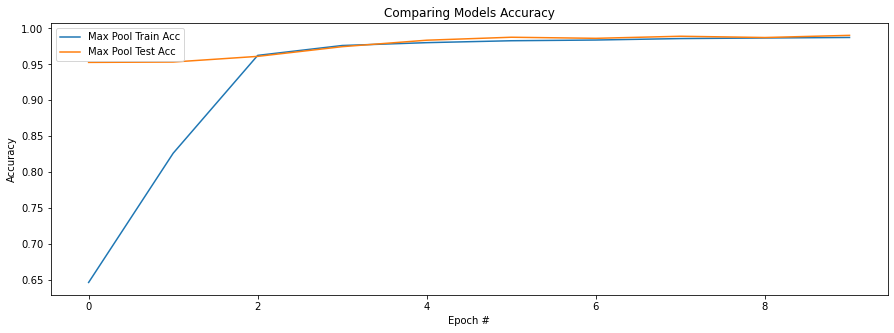

In [25]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, EPOCHS), H1.history["accuracy"], label="Max Pool Train Acc")
plt.plot(np.arange(0, EPOCHS), H1.history["val_accuracy"], label="Max Pool Test Acc")

plt.title("Comparing Models Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

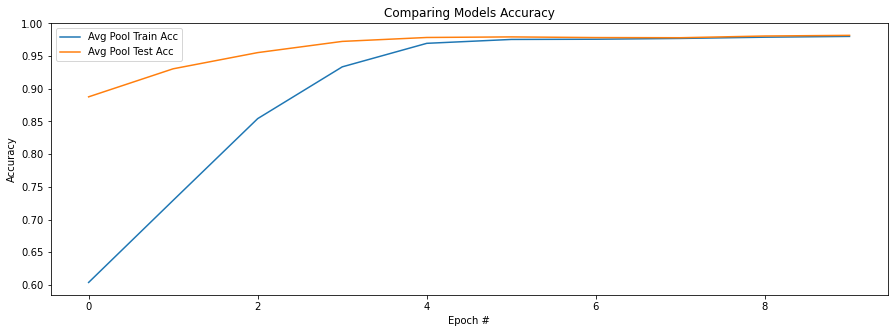

In [27]:
plt.figure(figsize=(15,5))

plt.plot(np.arange(0, EPOCHS), H2.history["accuracy"], label="Avg Pool Train Acc")
plt.plot(np.arange(0, EPOCHS), H2.history["val_accuracy"], label="Avg Pool Test Acc")
plt.title("Comparing Models Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

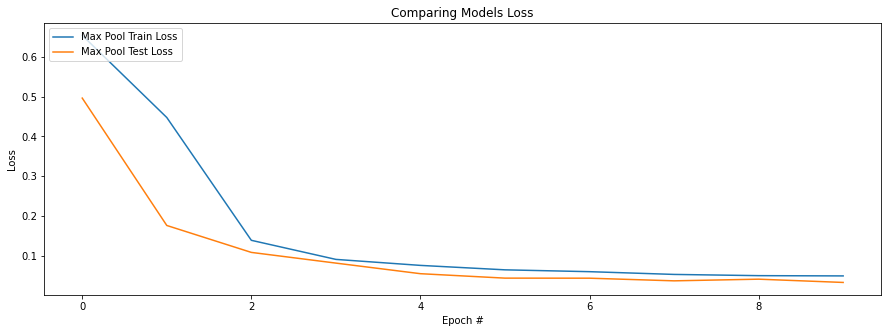

In [28]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, EPOCHS), H1.history["loss"], label="Max Pool Train Loss")
plt.plot(np.arange(0, EPOCHS), H1.history["val_loss"], label="Max Pool Test Loss")
plt.title("Comparing Models Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper left")

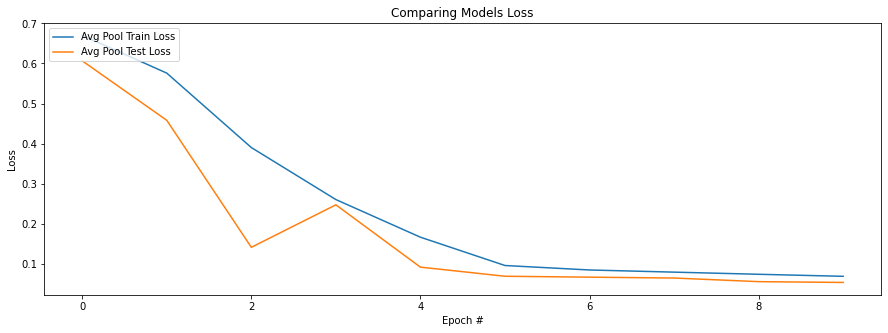

In [29]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, EPOCHS), H2.history["loss"], label="Avg Pool Train Loss")
plt.plot(np.arange(0, EPOCHS), H2.history["val_loss"], label="Avg Pool Test Loss")
plt.title("Comparing Models Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper left")